In [1]:
# step 1: simulate a 2 body gravitational problem (earth, sun) with Runga Kutta

In [1]:
# import libraries
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd

import plotly.graph_objects as go

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

In [2]:
# perform runga-kutta method for a problem with 3 spacial dimensions (x and y, and z) 
# any function can be passed as input for the forces acting on the system.
def runga_kutta_3d(position, velocity, timestep, Fx, Fy, Fz, args_x, args_y, args_z):
    # position = (x_n, y_n, z_n): the x, y and z position at time n
    # velocity = (Vx_n, Vy_n, Vz_n): the velocity vector components for x, y and z at time n
    # timestep: delta(t), interval of time between 2 approximations
    # F_x: the derivative function for x component of velocity
    # F_y: the derivation function for y component of velocity
    # F_z: the derivation function for z component of velocity
    # args_x: arguments to be passed to F_x (in addition to Vx, Vy, Vz, x, y, z)
    # args_y: arguments to be passed to F_y (in addition to Vx, Vy, Vz, x, y, z)
    # args_z: arguments to be passed to F_z (in addition to Vx, Vy, Vz, x, y, z)
    
    x_values = []
    y_values = []
    z_values = []
    
    Vx_values = []
    Vy_values = []
    Vz_values = []
    
    Fx_values = []
    Fy_values = []
    Fz_values = []
    
    # step 1
    x_values.append(position[0])
    y_values.append(position[1])
    z_values.append(position[2])
    
    Vx_values.append(velocity[0])
    Vy_values.append(velocity[1])
    Vz_values.append(velocity[2])
    
    Fx_values.append(Fx(args_x, Vx_values[0], Vy_values[0], Vz_values[0], x_values[0], y_values[0], z_values[0]))
    Fy_values.append(Fy(args_y, Vx_values[0], Vy_values[0], Vz_values[0], x_values[0], y_values[0], z_values[0]))
    Fz_values.append(Fz(args_z, Vx_values[0], Vy_values[0], Vz_values[0], x_values[0], y_values[0], z_values[0]))
    
    # step 2
    x_values.append(x_values[0] + Vx_values[0] * timestep/2)
    y_values.append(y_values[0] + Vy_values[0] * timestep/2)
    z_values.append(z_values[0] + Vz_values[0] * timestep/2)
    
    Vx_values.append(Vx_values[0] + Fx_values[0] * timestep/2)
    Vy_values.append(Vy_values[0] + Fy_values[0] * timestep/2)
    Vz_values.append(Vz_values[0] + Fz_values[0] * timestep/2)
    
    Fx_values.append(Fx(args_x, Vx_values[1], Vy_values[1], Vz_values[1], x_values[1], y_values[1], z_values[1]))
    Fy_values.append(Fy(args_y, Vx_values[1], Vy_values[1], Vz_values[1], x_values[1], y_values[1], z_values[1]))
    Fz_values.append(Fz(args_z, Vx_values[1], Vy_values[1], Vz_values[1], x_values[1], y_values[1], z_values[1]))
    
    # step 3
    x_values.append(x_values[0] + Vx_values[1] * timestep/2)
    y_values.append(y_values[0] + Vy_values[1] * timestep/2)
    z_values.append(z_values[0] + Vz_values[1] * timestep/2)
    
    Vx_values.append(Vx_values[0] + Fx_values[1] * timestep/2)
    Vy_values.append(Vy_values[0] + Fy_values[1] * timestep/2)
    Vz_values.append(Vz_values[0] + Fz_values[1] * timestep/2)
    
    Fx_values.append(Fx(args_x, Vx_values[2], Vy_values[2], Vz_values[2], x_values[2], y_values[2], z_values[2]))
    Fy_values.append(Fy(args_y, Vx_values[2], Vy_values[2], Vz_values[2], x_values[2], y_values[2], z_values[2]))
    Fz_values.append(Fz(args_z, Vx_values[2], Vy_values[2], Vz_values[2], x_values[2], y_values[2], z_values[2]))
    
    # step 4
    x_values.append(x_values[0] + Vx_values[2] * timestep)
    y_values.append(y_values[0] + Vy_values[2] * timestep)
    z_values.append(z_values[0] + Vz_values[2] * timestep)
    
    Vx_values.append(Vx_values[0] + Fx_values[2] * timestep)
    Vy_values.append(Vy_values[0] + Fy_values[2] * timestep)
    Vz_values.append(Vz_values[0] + Fz_values[2] * timestep)
    
    Fx_values.append(Fx(args_x, Vx_values[3], Vy_values[3], Vz_values[3], x_values[3], y_values[3], z_values[3]))
    Fy_values.append(Fy(args_y, Vx_values[3], Vy_values[3], Vz_values[3], x_values[3], y_values[3], z_values[3]))
    Fz_values.append(Fz(args_z, Vx_values[3], Vy_values[3], Vz_values[3], x_values[3], y_values[3], z_values[3]))
    
    # step 5
    x_final = x_values[0] + ((Vx_values[0] + 2*Vx_values[1] + 2*Vx_values[2] + Vx_values[3])*timestep)/6
    y_final = y_values[0] + ((Vy_values[0] + 2*Vy_values[1] + 2*Vy_values[2] + Vy_values[3])*timestep)/6
    z_final = z_values[0] + ((Vz_values[0] + 2*Vz_values[1] + 2*Vz_values[2] + Vz_values[3])*timestep)/6
    
    Vx_final = Vx_values[0] + ((Fx_values[0] +2*Fx_values[1] +2*Fx_values[2] + Fx_values[3])*timestep)/6
    Vy_final = Vy_values[0] + ((Fy_values[0] +2*Fy_values[1] +2*Fy_values[2] + Fy_values[3])*timestep)/6
    Vz_final = Vz_values[0] + ((Fz_values[0] +2*Fz_values[1] +2*Fz_values[2] + Fz_values[3])*timestep)/6
    
    return (x_final, y_final, z_final), (Vx_final, Vy_final, Vz_final)

def gravitational_force(args, Vx, Vy, Vz, x, y, z):
    n = args[0] # position of body in array of all bodies
    m = args[1] # mass array
    component = args[2] # "x", "y", or "z"
    x_all = args[3] # last x position of all bodies (array)
    y_all = args[4] # last x position of all bodies (array)
    z_all = args[5] # last x position of all bodies (array)
    G_or_const = args[6]
    
    F = 0
    
    # it s normal that it won't be equal at some point
#     if x != x_all[n] or y != y_all[n] or z != z_all[n]:
#         print("FALSE")
    
    for body in range(len(x_all)):
        if body != n:
            # claculate distance between 2 bodies
            r =  math.sqrt((x_all[body] - x)**2 + (y_all[body] - y)**2 + (z_all[body] - z)**2)
            # print("r:", r)
            if component == "x":
                F -= G_or_const * m[body] * ((x - x_all[body])/r**3)
            elif component == "y":
                F -= G_or_const * m[body] * ((y - y_all[body])/r**3)
            elif component == "z":
                F -= G_or_const * m[body] * ((z - z_all[body])/r**3)      
    return F

In [3]:
# universal gravitation constant
G = 6.67259e-20  # (km**3/kg/s**2)

# test gravitational_force() function
args = (1, [1, 0.0001], "x", [0,1], [0, 1], [0, 0], G)
F = gravitational_force(args, 0, 0, 0, 1, 1, 0)
print(F)

-2.3591168185387722e-20


## Tryout 1: with initial conditions from tutorial online

In [5]:
# tryout 1: works
input_file = "bodies_test.csv"
n_timesteps = 5000 # number of timesteps
timestep = 0.2
output_trajectories = "blender/trajectories_test.csv"

In [6]:
# open input file
df = pd.read_csv(input_file)
bodies = list(df['body'])
print(bodies)
df = df.set_index('body')
display(df)

# print(df.dtypes)

['body1', 'body2']


,x,y,z,Vx,Vy,Vz,mass
body,,,,,,,
body1,0,0,0,10,20,30,1.000e+26
body2,3000,0,0,0,40,0,1.000e+26


In [7]:
# part 1, no normalization
# constants
n_bodies = len(df)
print(n_bodies)

# set array of masses and divide by maximum mass (mass of sum)
m = list(df["mass"])
print(m)

2
[1e+26, 1e+26]


In [8]:
# initial conditions: store in arrays
# NASA JBL 01/01/2023 for eath and sun (vector table)
# observer: solar system barycenter 

x = []
y = []
z = []

Vx = []
Vy = []
Vz = []

for n in range(n_bodies):
    row = df.loc[bodies[n]]
    # print(row)
    x.append([row.x])
    y.append([row.y])
    z.append([row.z])
    
    Vx.append([row.Vx])
    Vy.append([row.Vy])
    Vz.append([row.Vz])
    
print("x:", x)
print("y:", y)
print("z:", z)
print("Vx:", Vx)
print("Vy:", Vy)
print("Vz:", Vz)

x: [[0.0], [3000.0]]
y: [[0.0], [0.0]]
z: [[0.0], [0.0]]
Vx: [[10.0], [0.0]]
Vy: [[20.0], [40.0]]
Vz: [[30.0], [0.0]]


In [9]:
for t in range(n_timesteps):
    
    # set array with latest position for all bodies
    x_last_all = []
    y_last_all = []
    z_last_all = []
    for n in range(n_bodies):
        x_last_all.append(x[n][-1])
        y_last_all.append(y[n][-1])
        z_last_all.append(z[n][-1])
    # print(x_last_all)
    # print(y_last_all)
    # print(z_last_all)
    
    for n in range(n_bodies):
        # for a specific body: p_components are its position, c_components are its velocity components
        p_components = (x_last_all[n], y_last_all[n], z_last_all[n])
        v_components = (Vx[n][-1], Vy[n][-1], Vz[n][-1])
        
        args_x = (n, m, "x", x_last_all, y_last_all, z_last_all, G)
        args_y = (n, m, "y", x_last_all, y_last_all, z_last_all, G)
        args_z = (n, m, "z", x_last_all, y_last_all, z_last_all, G)
        
        p_components, v_components = runga_kutta_3d(p_components, v_components, timestep, gravitational_force, gravitational_force, gravitational_force, args_x, args_y, args_z)
        
        # add new value in arrays
        x[n].append(p_components[0])
        y[n].append(p_components[1])
        z[n].append(p_components[2])
        
        Vx[n].append(v_components[0])
        Vy[n].append(v_components[1])
        Vz[n].append(v_components[2])

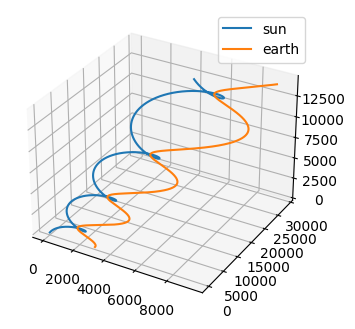

In [10]:
ax = plt.figure(dpi = 100).add_subplot(projection='3d')

ax.plot(x[0], y[0], z[0], label='sun')
ax.plot(x[1], y[1], z[1], label='earth')
ax.legend()
plt.show()

In [11]:
df_result = pd.DataFrame()
for n in range(len(bodies)):
    df_result["x_%s"%(bodies[n])] =  x[n]
    df_result["y_%s"%(bodies[n])] =  y[n]
    df_result["z_%s"%(bodies[n])] =  z[n]
for body in bodies:
    df_result[body] = df_result["x_%s"%(body)].astype(str) + "_" + df_result["y_%s"%(body)].astype(str) + "_" + df_result["z_%s"%(body)].astype(str)
    df_result = df_result.drop(labels = ["x_%s"%(body), "y_%s"%(body), "z_%s"%(body)], axis = 1)
display(df_result) 

df_result.to_csv(output_trajectories, index = False)   

,body1,body2
0,0.0_0.0_0.0,3000.0_0.0_0.0
1,2.0148345742942735_3.9999934031828865_5.999990...,2999.985172024153_7.999986819561596_0.0
2,4.059364933718668_7.999986819894442_11.9999207...,2999.940668100026_15.99991426032829_2.97161060...
3,6.133631595628202_12.000019952841761_17.999732...,2999.866447810384_23.99974253795074_0.00014870...
4,8.237675823502444_16.00013267040749_23.9993647...,2999.7624699928033_31.999431699943724_0.000416...
...,...,...
4996,3950.3768299626986_28649.67391149551_12030.592...,9484.68101855817_26951.269206385463_14577.0967...
4997,3947.370823330574_28654.98067544612_12033.0489...,9489.831339713164_26956.57105255044_14579.5596...
4998,3944.370647794898_28660.285648915135_12035.508...,9494.975830038082_26961.87468318526_14582.0198...
4999,3941.376292230313_28665.588837940737_12037.969...,9500.114500660091_26967.180092271818_14584.477...


In [12]:
# 3d visualization: tryout4.blend

## Tryout 2: 1st system with sun and earth

In [12]:
# tryout 2: 
input_file = "bodies.csv"
n_timesteps = 400 # number of timesteps
timestep = 86400
output_trajectories = "blender/trajectories_step1.csv"
output_body_properties = "blender/body_properties.csv"

In [13]:
# open input file
df = pd.read_csv(input_file)
bodies = list(df['body'])
print(bodies)
df = df.set_index('body')
display(df)

# print(df.dtypes)

['sun', 'earth']


,x,y,z,Vx,Vy,Vz,mass
body,,,,,,,
sun,-1.355e+06,1.421e+04,31439.404,0.002,-0.016,8.962e-05,1.989e+30
earth,-2.682e+07,1.449e+08,24130.011,-29.815,-5.296,-5.494e-04,5.972e+24


In [14]:
# part 2, non-dimentionalize code
# constants
n_bodies = len(df)
print(n_bodies)

# universal gravitation constant
G = 6.67259e-20  # (km**3/kg/s**2)
mass_sun = 1.989e30 # kg
AU = 1.496e8 #km
year = 3.156e7 #s
norm_const = (G * mass_sun * (year**2))/(AU**3)
print(norm_const)

# set array of masses and normalize
m = list(df["mass"])
m = [i/mass_sun for i in m]
print(m)

2
39.482844360900664
[1.0, 3.002513826043238e-06]


In [15]:
# initial conditions: store in arrays
# NASA JBL 01/01/2023 for eath and sun (vector table)
# observer: solar system barycenter 

x = []
y = []
z = []

Vx = []
Vy = []
Vz = []

# NORMALIZE POSITIONS AND VELOCITIES TOO
for n in range(n_bodies):
    row = df.loc[bodies[n]]
    # print(row)
    x.append([row.x/AU])
    y.append([row.y/AU])
    z.append([row.z/AU])
    
    Vx.append([row.Vx*(year/AU)])
    Vy.append([row.Vy*(year/AU)])
    Vz.append([row.Vz*(year/AU)])
    
print("x:", x)
print("y:", y)
print("z:", z)
print("Vx:", Vx)
print("Vy:", Vy)
print("Vz:", Vz)

x: [[-0.009055016159966617], [-0.1793085625550183]]
y: [[9.495630345800982e-05], [0.9685666471737507]]
z: [[0.00021015644618283588], [0.00016129686599527607]]
Vx: [[0.00034519862016138184], [-6.289811699774153]]
Vy: [[-0.0032874007978930778], [-1.1172406489022908]]
Vz: [[1.890567695852678e-05], [-0.00011589652108919248]]


In [16]:
n_timesteps = 365 # number of timesteps
timestep = 86400/year
print(timestep)

0.0027376425855513307


In [17]:
for t in range(n_timesteps):
    
    # set array with latest position for all bodies
    x_last_all = []
    y_last_all = []
    z_last_all = []
    for n in range(n_bodies):
        x_last_all.append(x[n][-1])
        y_last_all.append(y[n][-1])
        z_last_all.append(z[n][-1])
    # print(x_last_all)
    # print(y_last_all)
    # print(z_last_all)
    
    for n in range(n_bodies):
        # for a specific body: p_components are its position, c_components are its velocity components
        p_components = (x_last_all[n], y_last_all[n], z_last_all[n])
        v_components = (Vx[n][-1], Vy[n][-1], Vz[n][-1])
        
        args_x = (n, m, "x", x_last_all, y_last_all, z_last_all, norm_const)
        args_y = (n, m, "y", x_last_all, y_last_all, z_last_all, norm_const)
        args_z = (n, m, "z", x_last_all, y_last_all, z_last_all, norm_const)
        
        p_components, v_components = runga_kutta_3d(p_components, v_components, timestep, gravitational_force, gravitational_force, gravitational_force, args_x, args_y, args_z)
        
        # add new value in arrays
        x[n].append(p_components[0])
        y[n].append(p_components[1])
        z[n].append(p_components[2])
        
        Vx[n].append(v_components[0])
        Vy[n].append(v_components[1])
        Vz[n].append(v_components[2])

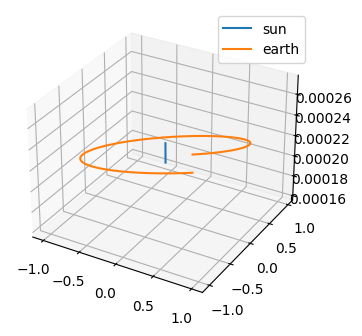

In [18]:
ax = plt.figure(dpi = 100).add_subplot(projection='3d')
# ax.set_aspect('equal')
ax.plot(x[0], y[0], z[0], label='sun')
ax.plot(x[1], y[1], z[1], label='earth')
ax.legend()
plt.show()

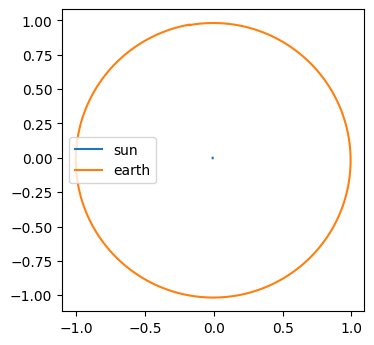

In [19]:
fig = plt.figure(dpi = 100)
ax = plt.subplot()
ax.set_aspect('equal')
ax.plot(x[0], y[0], label='sun')
ax.plot(x[1], y[1], label='earth')
ax.legend()
plt.show()

In [20]:
df_result = pd.DataFrame()
for n in range(len(bodies)):
    df_result["x_%s"%(bodies[n])] =  x[n]
    df_result["y_%s"%(bodies[n])] =  y[n]
    df_result["z_%s"%(bodies[n])] =  z[n]
for body in bodies:
    df_result[body] = df_result["x_%s"%(body)].astype(str) + "_" + df_result["y_%s"%(body)].astype(str) + "_" + df_result["z_%s"%(body)].astype(str)
    df_result = df_result.drop(labels = ["x_%s"%(body), "y_%s"%(body), "z_%s"%(body)], axis = 1)
display(df_result) 

df_result.to_csv(output_trajectories, index = False)   

,sun,earth
0,-0.009055016159966617_9.495630345800982e-05_0....,-0.1793085625550183_0.9685666471737507_0.00016...
1,-0.009054071209070192_8.595702753203883e-05_0....,-0.19650043205937415_0.9653574935891776_0.0001...
2,-0.009053126425304493_7.695865512324072e-05_0....,-0.21363396109359747_0.9618479115082871_0.0001...
3,-0.009052181824717903_6.79611831476177e-05_0.0...,-0.23070381393624817_0.9580389771752597_0.0001...
4,-0.009051237423300421_5.8964608226922115e-05_0...,-0.24770467526478424_0.9539318646536092_0.0001...
...,...,...
361,-0.008732763551623314_-0.003157115674778246_0....,-0.10904173611341796_0.9751668827552249_0.0001...
362,-0.008731818089755605_-0.003166118627799507_0....,-0.12641462789050267_0.9731804305264898_0.0001...
363,-0.008730872729704981_-0.0031751206678603526_0...,-0.14375090456100806_0.9708902048683652_0.0001...
364,-0.008729927487697037_-0.0031841217968466558_0...,-0.16104516749431583_0.9682968835090275_0.0001...


In [21]:
# create body_properties file
r_sun = 695700 # km
r_earth = 6378 # km

sun = ["Yellow-255-255-0-1", float(r_sun/AU)]
earth = ["Blue-0-0-255-1", float(r_earth/AU)]

sun = ["Yellow-255-255-0-1", 0.1]
earth = ["Blue-0-0-255-1", 0.01]


print(r_sun/AU)
df_properties = pd.DataFrame()
df_properties["sun"] = sun
df_properties["earth"] = earth
display(df_properties)

df_properties.to_csv(output_body_properties, index = False)

0.0046504010695187165


,sun,earth
0,Yellow-255-255-0-1,Blue-0-0-255-1
1,0.1,0.01


## try to set up initial condition assuming circular velocity

In [35]:
x = [[], [df.loc['earth'][0]/AU]]  
y = [[0], [0]]
z = [[0], [0]]
Vx = [[0], [0]]
Vy = [[], []]
Vz = [[0], [0]]

# sun position: x_sun = - (mass_earth * x_earth) / mass_sun
star_pos = -1 * (m[1] * x[1][0]) / (m[0])
x[0].append(star_pos)

# velocity of planet
v_planet = -1 * math.sqrt(norm_const * (m[0]/(x[0][0] - x[1][0])))
Vy[1].append(v_planet)

# velocity of star
v_star = math.sqrt(norm_const * (m[1]/(x[0][0] - x[1][0])))
Vy[0].append(v_star)

print("x:", x)
print("y:", y)
print("z:", z)
print("Vx:", Vx)
print("Vy:", Vy)
print("Vz:", Vz)

x: [[5.383764381993814e-07], [-0.1793085625550183]]
y: [[0], [0]]
z: [[0], [0]]
Vx: [[0], [0]]
Vy: [[0.025712574167411864], [-14.838945830877263]]
Vz: [[0], [0]]


In [36]:
n_timesteps = 100 # number of timesteps
timestep = 86400/year
print(timestep)

0.0027376425855513307


In [37]:
for t in range(n_timesteps):
    
    # set array with latest position for all bodies
    x_last_all = []
    y_last_all = []
    z_last_all = []
    for n in range(n_bodies):
        x_last_all.append(x[n][-1])
        y_last_all.append(y[n][-1])
        z_last_all.append(z[n][-1])
    # print(x_last_all)
    # print(y_last_all)
    # print(z_last_all)
    
    for n in range(n_bodies):
        # for a specific body: p_components are its position, c_components are its velocity components
        p_components = (x_last_all[n], y_last_all[n], z_last_all[n])
        v_components = (Vx[n][-1], Vy[n][-1], Vz[n][-1])
        
        args_x = (n, m, "x", x_last_all, y_last_all, z_last_all, norm_const)
        args_y = (n, m, "y", x_last_all, y_last_all, z_last_all, norm_const)
        args_z = (n, m, "z", x_last_all, y_last_all, z_last_all, norm_const)
        
        p_components, v_components = runga_kutta_3d(p_components, v_components, timestep, gravitational_force, gravitational_force, gravitational_force, args_x, args_y, args_z)
        
        # add new value in arrays
        x[n].append(p_components[0])
        y[n].append(p_components[1])
        z[n].append(p_components[2])
        
        Vx[n].append(v_components[0])
        Vy[n].append(v_components[1])
        Vz[n].append(v_components[2])

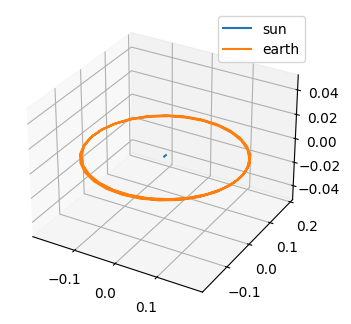

In [41]:
ax = plt.figure(dpi = 100).add_subplot(projection='3d')
# ax.set_aspect('equal')
ax.plot(x[0], y[0], z[0], label='sun')
ax.plot(x[1], y[1], z[1], label='earth')
ax.legend()
plt.show()